<a href="https://colab.research.google.com/github/dudgus1286/pandas/blob/main/%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%A7%88%EC%9D%B4%EB%8B%9D/06_%EC%87%BC%ED%95%91_%EB%A6%AC%EB%B7%B0_%EA%B5%B0%EC%A7%91%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 10.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
import koreanize_matplotlib

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# 데이터 로드
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/텍스트마이닝/data/shop-review.csv')
df.shape

(5996, 4)

In [5]:
df.head()

,title,content,product,mallName
0,에어팟프로1세대를 계속 사용 했으나 배터리 빠른 소모로 인해 2세대로 교체 했습니다...,에어팟프로1세대를 계속 사용 했으나 배터리 빠른 소모로 인해 2세대로 교체 했습니다...,에어팟프로2세대,애플 공식 브랜드스토어
1,&lt;새로운 것과 좋았던 것의 균형감&gt;1. 노이즈 캔슬링에어팟 1세대 대비 ...,&lt;새로운 것과 좋았던 것의 균형감&gt;<br><br><br>1. 노이즈 캔슬...,에어팟프로2세대,애플 공식 브랜드스토어
2,번개 같은 빠름으로? 사전예약 후 지난 10월 21일 수령해서 지금까지 한달 넘게 ...,번개 같은 빠름으로? 사전예약 후 지난 10월 21일 수령해서 지금까지 한달 넘게 ...,에어팟프로2세대,애플 공식 브랜드스토어
3,먼저 빠른배송 감사합니다. 21일 12시에 받고 현재 2시간동안 귀에서 빼지않고있습...,먼저 <em>빠른배송 감사합니다</em>. 21일 12시에 받고 현재 2시간동안 귀...,에어팟프로2세대,애플 공식 브랜드스토어
4,에어팟 프로 2세대 구매&amp; 사용 후기 1. 가격&amp;배송 우선 애플...,에어팟 프로 2세대 구매&amp; 사용 후기<br> 1. 가격&amp;배송<br> ...,에어팟프로2세대,애플 공식 브랜드스토어


In [6]:
df['product'].unique()

array(['에어팟프로2세대', '선크림', '물티슈'], dtype=object)

In [7]:
df['product'].value_counts()

product
물티슈         2000
선크림         1999
에어팟프로2세대    1997
Name: count, dtype: int64

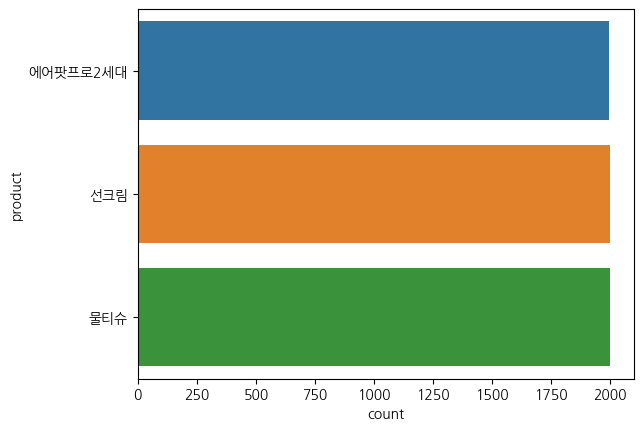

In [8]:
# plt.barh(y=df['product'].unique(), width=df['product'].value_counts())
sns.countplot(data=df, y='product', hue ='product');

### 전처리
- HTML 태그와 엔티티 제거

In [9]:
df['title']

0       에어팟프로1세대를 계속 사용 했으나 배터리 빠른 소모로 인해 2세대로 교체 했습니다...
1       &lt;새로운 것과 좋았던 것의 균형감&gt;1. 노이즈 캔슬링에어팟 1세대 대비 ...
2       번개 같은 빠름으로? 사전예약 후 지난 10월 21일 수령해서 지금까지 한달 넘게 ...
3       먼저 빠른배송 감사합니다. 21일 12시에 받고 현재 2시간동안 귀에서 빼지않고있습...
4       에어팟 프로 2세대 구매&amp; 사용 후기 1. 가격&amp;배송    우선 애플...
                              ...                        
5991                                           늘 쓰는 상품이에요
5992              또 주문했어요 근데 이번에는 좀 바꼈네요?? 처음본 로고가 있네요 ㅎㅎ
5993                   오랜만에 미엘 물티슈~가격대비 물디슈평량 용량 대비만족입니다!
5994                                            쓰기 편하고좋아요
5995      두번째 구매하고 쓰고있어요 수분도 많고 두께도 두꺼웠어 좋아요 .계속했어 쓰고싶어요.
Name: title, Length: 5996, dtype: object

In [10]:

df['title'].str.replace('&*;','', regex=True)

0       에어팟프로1세대를 계속 사용 했으나 배터리 빠른 소모로 인해 2세대로 교체 했습니다...
1       &lt새로운 것과 좋았던 것의 균형감&gt1. 노이즈 캔슬링에어팟 1세대 대비 좋아...
2       번개 같은 빠름으로? 사전예약 후 지난 10월 21일 수령해서 지금까지 한달 넘게 ...
3       먼저 빠른배송 감사합니다. 21일 12시에 받고 현재 2시간동안 귀에서 빼지않고있습...
4       에어팟 프로 2세대 구매&amp 사용 후기 1. 가격&amp배송    우선 애플 공...
                              ...                        
5991                                           늘 쓰는 상품이에요
5992              또 주문했어요 근데 이번에는 좀 바꼈네요?? 처음본 로고가 있네요 ㅎㅎ
5993                   오랜만에 미엘 물티슈~가격대비 물디슈평량 용량 대비만족입니다!
5994                                            쓰기 편하고좋아요
5995      두번째 구매하고 쓰고있어요 수분도 많고 두께도 두꺼웠어 좋아요 .계속했어 쓰고싶어요.
Name: title, Length: 5996, dtype: object

In [11]:
# 태그 제거 : 정규식
# <.*?> : <>, <a>, <div> ~ </div><hi> ~ </hi>
# &[^;]+; : &lt;, &gt;, &amp; 등

df['title_re'] = df['title'].str.replace('<.*?>|&[^;]+;', " ", regex=True)
df['content_re'] = df['content'].str.replace('<.*?>|&[^;]+;', " ", regex=True)
df.head()

,title,content,product,mallName,title_re,content_re
0,에어팟프로1세대를 계속 사용 했으나 배터리 빠른 소모로 인해 2세대로 교체 했습니다...,에어팟프로1세대를 계속 사용 했으나 배터리 빠른 소모로 인해 2세대로 교체 했습니다...,에어팟프로2세대,애플 공식 브랜드스토어,에어팟프로1세대를 계속 사용 했으나 배터리 빠른 소모로 인해 2세대로 교체 했습니다...,에어팟프로1세대를 계속 사용 했으나 배터리 빠른 소모로 인해 2세대로 교체 했습니다...
1,&lt;새로운 것과 좋았던 것의 균형감&gt;1. 노이즈 캔슬링에어팟 1세대 대비 ...,&lt;새로운 것과 좋았던 것의 균형감&gt;<br><br><br>1. 노이즈 캔슬...,에어팟프로2세대,애플 공식 브랜드스토어,새로운 것과 좋았던 것의 균형감 1. 노이즈 캔슬링에어팟 1세대 대비 좋아진 것을...,새로운 것과 좋았던 것의 균형감 1. 노이즈 캔슬링 에어팟 1세대 대비 좋...
2,번개 같은 빠름으로? 사전예약 후 지난 10월 21일 수령해서 지금까지 한달 넘게 ...,번개 같은 빠름으로? 사전예약 후 지난 10월 21일 수령해서 지금까지 한달 넘게 ...,에어팟프로2세대,애플 공식 브랜드스토어,번개 같은 빠름으로? 사전예약 후 지난 10월 21일 수령해서 지금까지 한달 넘게 ...,번개 같은 빠름으로? 사전예약 후 지난 10월 21일 수령해서 지금까지 한달 넘게 ...
3,먼저 빠른배송 감사합니다. 21일 12시에 받고 현재 2시간동안 귀에서 빼지않고있습...,먼저 <em>빠른배송 감사합니다</em>. 21일 12시에 받고 현재 2시간동안 귀...,에어팟프로2세대,애플 공식 브랜드스토어,먼저 빠른배송 감사합니다. 21일 12시에 받고 현재 2시간동안 귀에서 빼지않고있습...,먼저 빠른배송 감사합니다 . 21일 12시에 받고 현재 2시간동안 귀에서 빼지않고...
4,에어팟 프로 2세대 구매&amp; 사용 후기 1. 가격&amp;배송 우선 애플...,에어팟 프로 2세대 구매&amp; 사용 후기<br> 1. 가격&amp;배송<br> ...,에어팟프로2세대,애플 공식 브랜드스토어,에어팟 프로 2세대 구매 사용 후기 1. 가격 배송 우선 애플 공식 인증 스...,에어팟 프로 2세대 구매 사용 후기 1. 가격 배송 우선 애플 공식 인...


### 벡터화

In [12]:
# TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvect = TfidfVectorizer()
tfidfvect

TfidfVectorizer()

In [13]:
dtm = tfidfvect.fit_transform(df['title_re'] + " " + df['content_re'])
dtm

<5996x36719 sparse matrix of type '<class 'numpy.float64'>'
	with 118012 stored elements in Compressed Sparse Row format>

In [56]:
tfidfvect = TfidfVectorizer(max_features=2000)
dtm = tfidfvect.fit_transform(df['title_re'] + " " + df['content_re']+" "+df['product'])
dtm

<5996x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 72089 stored elements in Compressed Sparse Row format>

In [57]:
df_dtm = pd.DataFrame(dtm.toarray(), columns=tfidfvect.get_feature_names_out())
df_dtm.head(2)

,10,100,100매,100매라,100매에,10월,10팩,11번가,11번가에서,1년,...,회사에서도,효과,효과가,후기,후기가,후기를,후기보고,훌륭합니다,훨씬,흡수도
0,0.079696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031364,...,0.0,0.0,0.029016,0.0,0.0,0.0,0.0,0.0,0.0,0.0


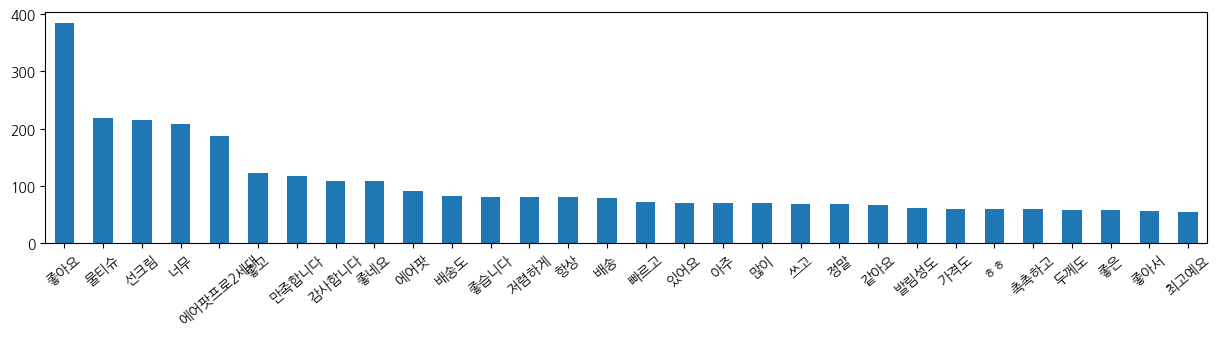

In [58]:
df_dtm.sum().nlargest(30).plot(kind='bar', figsize=(15,3), rot=40);

### 군집화

In [59]:
df_dtm.values

array([[0.07969557, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04885186, 0.04494495, 0.        , ..., 0.        , 0.03685102,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

#### 군집화 - 기본 개념 잡기

In [18]:
# 군집화

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tqdm import trange

kmeans = KMeans(n_clusters=4, n_init='auto', random_state=42)
kmeans.fit(df_dtm)

KMeans(n_clusters=4, n_init='auto', random_state=42)

In [19]:
# 학습결과 평가1
# kmeans.labels_
kmeans.inertia_ # 거리가 가까울수록 낮게 나와야 함
# => 같은 군집 안 요소들끼리는 가깝고, 다른 군집의 요소하곤 거리가 멂

5732.88216016323

In [20]:
# 평가2
# 1 과 가까울수록 best, -1 : worst, 0 : 다른 군집과 겹쳐짐
silhouette_score(df_dtm, kmeans.labels_)

0.009140328971464195

#### 군집화 - 적당한 n_cluster 를 찾기 위한 함수 작성

In [60]:
# KMeans(
#     n_clusters=8,
#     *,
#     init='k-means++',
#     n_init=10,
#     max_iter=300,
#     tol=0.0001,
#     verbose=0,
#     random_state=None,
#     copy_x=True,
#     algorithm='lloyd',
# )

inertias = []
silhouttes = []

for n in trange(2, 20):
  kmeans = KMeans(n_clusters=n, n_init='auto', random_state=42)
  kmeans.fit(df_dtm)
  inertias.append(kmeans.inertia_)
  silhouttes.append(silhouette_score(df_dtm, kmeans.labels_))

100%|██████████| 18/18 [01:29<00:00,  4.97s/it]


In [61]:
# 거리값 추출
inertias

[5842.3686290635815,
 5780.723054310817,
 5747.896092881319,
 5716.608402374467,
 5687.264377794954,
 5675.475642922012,
 5632.166084429387,
 5609.434973834818,
 5592.2416182482475,
 5574.066164302551,
 5539.992644054826,
 5541.517550704293,
 5526.718953876046,
 5512.338995332117,
 5498.054421819913,
 5491.809322633315,
 5478.495956972573,
 5466.980718529294]

In [62]:
silhouttes

[0.004061377243232068,
 0.006432604338263264,
 0.007702235363374908,
 0.007635041936428614,
 0.010169780206226707,
 0.01009921832001845,
 0.011684389978205067,
 0.005014860378550748,
 0.004072845773441479,
 0.004118037111763361,
 0.007999538113052533,
 0.010477123920493596,
 0.011069987774952182,
 0.011356068549227412,
 0.011862894882875695,
 0.008036105047545632,
 0.008776951272407534,
 0.00917608573796482]

## inertia 시각화

### Elbow Method

* Number of clusters
* Within-Cluster Sum of Square

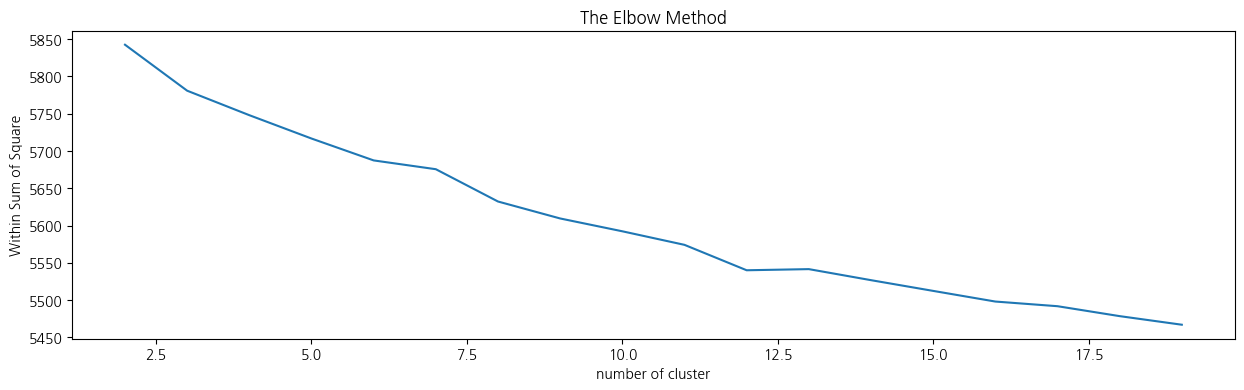

In [63]:
plt.figure(figsize=(15,4))

plt.plot(range(2,20), inertias)
plt.title('The Elbow Method')
plt.xlabel('number of cluster')
plt.ylabel('Within Sum of Square');

## Shilhouette Analysis(실루엣 분석)

- 군집화 평가 방법으로 실루엣 분석(Shilhouette Analysis)이 있음.
- 실루엣 분석은 각 군집 간의 거리가 얼마나 **효율적으로 분리**돼 있는지를 알 수 있음
  - 다른 군집과의 거리는 떨어져 있고, 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 의미
  - 군집화가 잘 될수록 개별 군집은 비슷한 정도의 여유공간을 가지고 떨어져 있게 됨

- 좋은 군집화가 되기 위한 기준 조건
  - 전체 실루엣 계수의 평균값, 즉 사이킷런의 silhouette_score() 값은 -1~1 사이의 값을 가지며, 1에 가까울수록 좋다.
  - 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요하며 개별 군집의 평균값의 편차가 크지 않아야 함
  - **전체 실루엣 계수의 평균값은 높지만, 특정 군집의 실루엣 계수 평균값만 유난히 높고 다른 군집들의 실루엣 계수 평균값은 낮으면 좋은 군집화 조건이 아님**


* 좋은 군집화가 되기 위한 기준 조건
    
    * 하지만 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 합니다. 즉, 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요합니다. 만약 전체 실루엣 계수의 평균값은 높지만, 특정 군집의 실루엣 계수 평균값만 유난히 높고 다른 군집들의 실루엣 계수 평균값은 낮으면 좋은 군집화 조건이 아닙니다.


## Silhouette Score(실루엣 점수)

* https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

- 정답 레이블을 모르는 경우 모델 자체를 사용하여 평가 수행.
- 실루엣 계수( sklearn.metrics.silhouette_score)는 이러한 평가의 한 예이며 실루엣 계수 점수가 높을수록 클러스터가 더 잘 정의된 모델과 관련됨.
- 실루엣 계수는 각 샘플에 대해 정의되며 두 가지 점수로 구성
  * a : 샘플과 동일한 클래스의 다른 모든 점 사이의 평균 거리.
  * b : 표본과 다음으로 가장 가까운 군집 의 다른 모든 점 사이의 평균 거리
  * 단일 샘플에 대한 실루엣 계수 s 는 다음과 같이 주어집니다.
      * `s = (b-a)/max(a,b)`
    

* 사이킷런의 실루엣 분석 메서드

* https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

* `silhouette_samples(X, labels, metric='euclidean', **kwds)`: X feature 데이터 세트와 각 feature데이터 세트가 속한 군집 레이블 값인 labels데이터를 입력해주면 각 데이터 포인트의 실루엣 계수를 계산해 반환.
* `silhouette_score(X, labels, metric='euclidean', sample_size=None, **kwds)`: 인자로 X feature데이터 세트와 각 feature 데이터 세트가 속한 레이블 값인 labels데이터를 입력해주면 전체 데이터의 실루엣 계수 값을 평균해 반환. 즉 np.mean(silhouette_samples())입니다. 일반적으로 이 값이 높을수록 군집화가 어느 정도 잘 됐다고 판단가능(단 무조건 이 값이 높다고 해서 군집화가 잘 됐다고 판단할 수는 없음.)

* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score


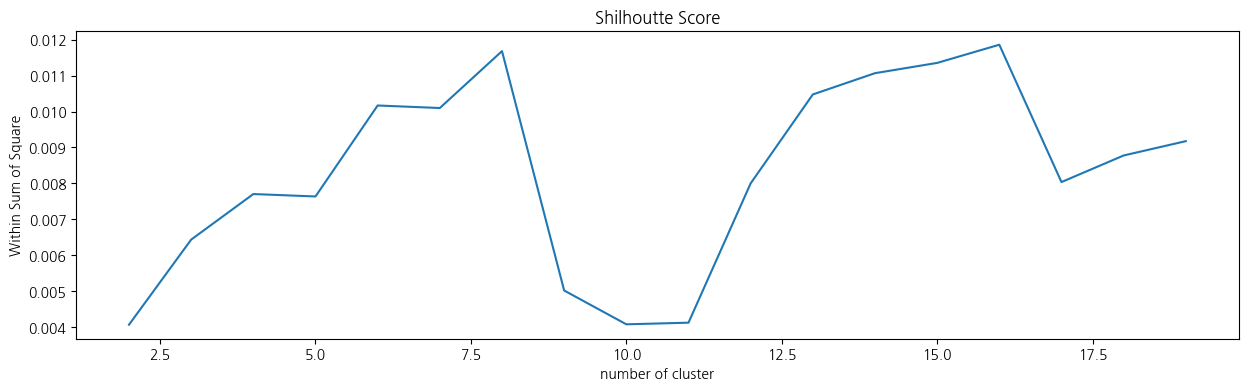

In [64]:
plt.figure(figsize=(15,4))

plt.plot(range(2,20), silhouttes)
plt.title('Shilhoutte Score')
plt.xlabel('number of cluster')
plt.ylabel('Within Sum of Square');

### 클러스터의 수를 정해서 군집화
- 앞에서 구한 inertia 와 ellbow(inertia와 다른 군집과의 거리 고려) 값을 이용해 적당한 클러스터 개수를 잡음


In [27]:
kmeans = KMeans(n_clusters=9, n_init='auto', random_state=42)
kmeans.fit(df_dtm)

KMeans(n_clusters=9, n_init='auto', random_state=42)

In [28]:
# predict(df_dtm)
# True 평균값은 1.0
(kmeans.labels_ == kmeans.predict(df_dtm)).mean()

1.0

In [29]:
df['cluster'] = kmeans.labels_
df['cluster'].value_counts()

cluster
4    3315
2     536
3     484
5     379
1     363
0     362
6     236
8     207
7     114
Name: count, dtype: int64

In [33]:
# silhouette_score 구하기

silhouette_avg = silhouette_score(df_dtm, kmeans.labels_)
silhouette_avg

0.014293120452363778

### 실루엣 분석 시각화 - 군집화 얼마나 잘 됐니?
* https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [34]:
X = df_dtm.values
n_clusters = 9

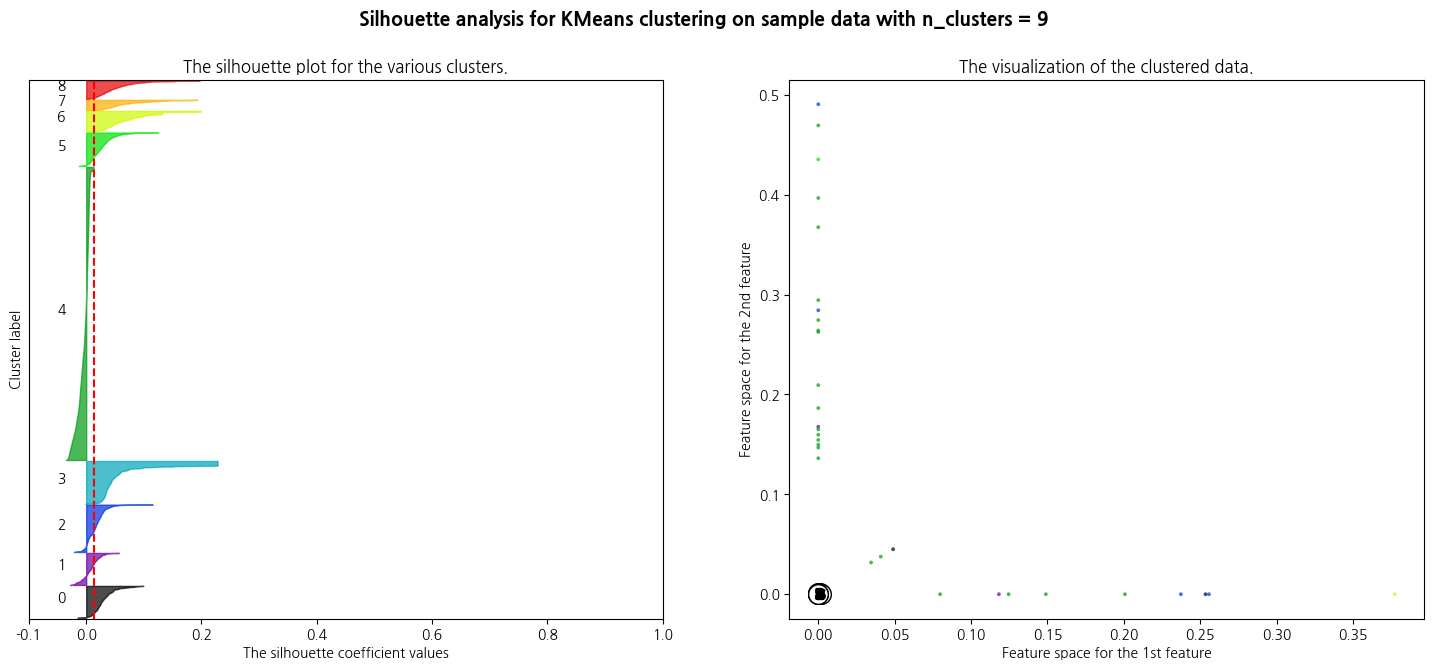

In [35]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

cluster_labels = kmeans.labels_
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(
    X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)

# Labeling the clusters
centers = kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
)

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(
    "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
    % n_clusters,
    fontsize=14,
    fontweight="bold",
)

plt.show()

- 클러스터의 수를 4개로 하니 값은 0 에 가깝고, - 값 으로 가는 것도 있음
- 0 에 가까우면 다른 군집과 겹치는 상태
- 군집화를 할 때 고려해야 할 내용은 클러스터 수 + 입력된 텍스트도 중요함

### 실제 제품과 군집 비교

In [36]:
pd.crosstab(df['product'], df['cluster']).style.background_gradient(axis=None)

cluster,0,1,2,3,4,5,6,7,8
product,,,,,,,,,
물티슈,0,0,171,117,1528,81,73,0,30
선크림,0,363,129,254,772,235,60,114,72
에어팟프로2세대,362,0,236,113,1015,63,103,0,105


<Axes: xlabel='cluster', ylabel='count'>

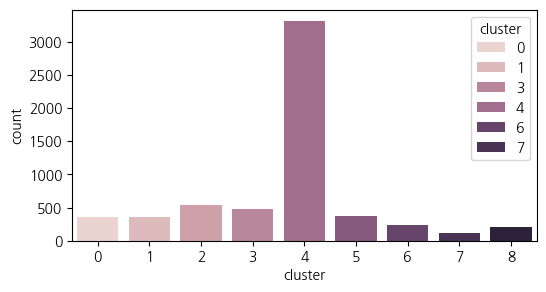

In [37]:
# countplot

plt.figure(figsize=(6,3))
sns.countplot(data=df, x='cluster', hue='cluster');

In [46]:
df_dtm.loc[df[df['cluster'] == 1].index].sum().nlargest(20)

달바       42.925276
톤업       37.988283
톤업도      27.426177
좋아요      23.305565
선크림      22.936655
되고       22.853011
촉촉하고     12.142561
썬크림      11.943325
바르고      11.081977
너무        9.366078
피부가       9.071548
좋네요       7.941545
적당히       6.442117
처음        6.385176
없고        6.188947
구매했어요     5.933647
자연스럽게     5.837739
선크림은      5.776430
피부        5.698207
좋아서       5.617060
dtype: float64

## 각 군집별 키워드 TF-IDF 값 합계 순위

In [48]:
def kmeans_tfidf(no):
  df_cluster = df_dtm.loc[df[df['cluster'] == no].index]
  df_cluster.sum().nlargest(20).plot(kind='bar', figsize=(8,3), rot=40)

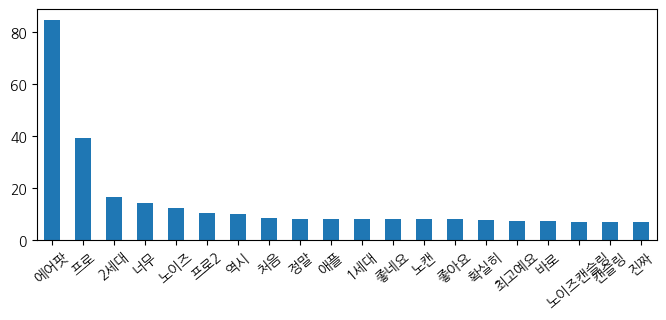

In [49]:
# 군집별 TF-IDF 키워드 시각화

kmeans_tfidf(0)

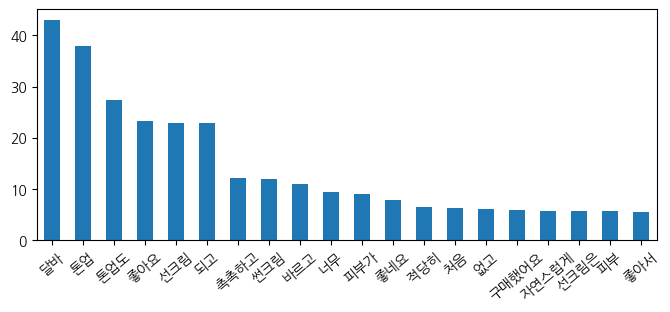

In [52]:
kmeans_tfidf(1)

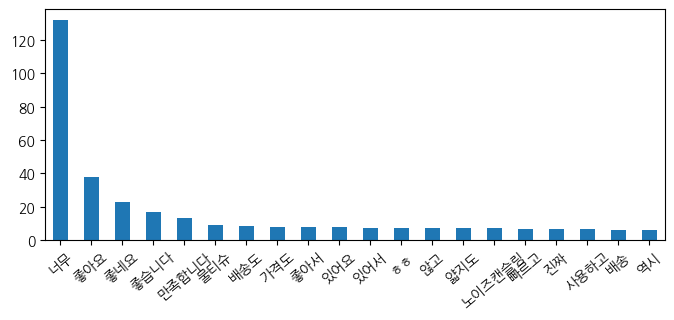

In [53]:
kmeans_tfidf(2)

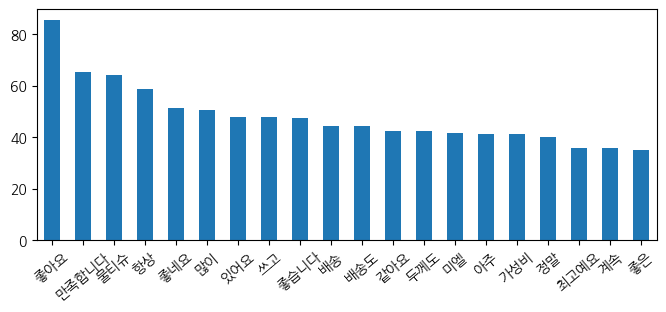

In [55]:
kmeans_tfidf(4)